https://www.kaggle.com/c/sberbank-russian-housing-market/data

# **Прогнозирование цены продажи объектов недвижимости**

# train and test columns

## price_doc: sale price (this is the target variable) 
## id: transaction id
## timestamp: date of transaction
## full_sq: total area in square meters, including loggias, balconies and other non-residential areas
## life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
## floor: for apartments, floor of the building
## max_floor: number of floors in the building
## material: wall material
## build_year: year built
## num_room: number of living rooms
## kitch_sq: kitchen area
## state: apartment condition
## product_type: owner-occupier purchase or investment
## sub_area: name of the district
## full_all: subarea population
## male_f, female_f: subarea population by gender
## young_*: population younger than working age
## work_*: working-age population
## ekder_*: retirement-age population
## n_m_{all|male|female}: population between n and m years old
## build_count_*: buildings in the subarea by construction type or year
## x_count_500: the number of x within 500m of the property
## x_part_500: the share of x within 500m of the property
## _sqm_: square meters
## cafe_count_d_price_p: number of cafes within d meters of the property that have an average bill under p RUB
## trc_: shopping malls
## prom_: industrial zones
## green_: green zones
## metro_: subway
## _avto_: distances by car
## mkad_: Moscow Circle Auto Road
## ttk_: Third Transport Ring
## sadovoe_: Garden Ring
## bulvar_ring_: Boulevard Ring
## kremlin_: City center
## zd_vokzaly_: Train station
## oil_chemistry_: Dirty industry
## ts_: Power plan
## ...

### The dataset also includes a collection of features about each property's surrounding neighbourhood, and some features that are constant across each sub area (known as a Raion). Most of the feature names are self explanatory, with the following notes. See below for a complete list.

# Analyse information of the table

### *predict the value of column 'price_doc'.*

# Импортирование нужных библиотек

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics, preprocessing, manifold

In [430]:
import warnings
warnings.filterwarnings('ignore')

In [431]:
pd.options.display.max_columns = None

In [432]:
train = pd.read_csv('train.csv')
display(train)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [433]:
test = pd.read_csv('test.csv')
display(test)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

## Analyse of the main features

In [434]:
main_features = ['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room',
                 'kitch_sq', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part',
                 'children_preschool', 'young_all', 'work_all', 'ekder_all', 'children_school', 'hospital_beds_raion', 
                 'metro_min_walk', 'market_shop_km', 'school_km', 'green_zone_km', 'mkad_km', 'sadovoe_km', 'build_count_wood', 
                 'radiation_km', 'price_doc']
train_main = train[main_features]

In [435]:
train_main['timestamp'] = pd.to_datetime(train_main['timestamp'], format='%Y-%m-%d')
train_main['year'] = train_main['timestamp'].dt.year
train_main['month'] = train_main['timestamp'].dt.month
train_main['week_of_year'] = train_main['timestamp'].dt.weekofyear

In [436]:
train_main.columns

Index(['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'product_type', 'sub_area',
       'area_m', 'raion_popul', 'green_zone_part', 'indust_part',
       'children_preschool', 'young_all', 'work_all', 'ekder_all',
       'children_school', 'hospital_beds_raion', 'metro_min_walk',
       'market_shop_km', 'school_km', 'green_zone_km', 'mkad_km', 'sadovoe_km',
       'build_count_wood', 'radiation_km', 'price_doc', 'year', 'month',
       'week_of_year'],
      dtype='object')

In [437]:
def day_number(row):
    year = row[30]
    week_number = row[32]
    if (year == 2011):
        return week_number
    if (year == 2012):
        return week_number + 52
    if (year == 2013):
        return week_number + 2 * 52
    if (year == 2014):
        return week_number + 3 * 52
    if (year == 2015):
        return week_number + 4 * 52


train_main['week_count'] = train_main.apply(day_number, axis=1)

In [438]:
print(train_main.shape)
train_main.info()

(30471, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            30471 non-null  datetime64[ns]
 1   full_sq              30471 non-null  int64         
 2   life_sq              24088 non-null  float64       
 3   floor                30304 non-null  float64       
 4   max_floor            20899 non-null  float64       
 5   material             20899 non-null  float64       
 6   build_year           16866 non-null  float64       
 7   num_room             20899 non-null  float64       
 8   kitch_sq             20899 non-null  float64       
 9   product_type         30471 non-null  object        
 10  sub_area             30471 non-null  object        
 11  area_m               30471 non-null  float64       
 12  raion_popul          30471 non-null  int64         
 13  green_zone_part    

In [439]:
float_features = ['full_sq', 'life_sq', 'kitch_sq', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part',
                  'children_preschool', 'young_all', 'work_all', 'ekder_all', 'children_school', 'hospital_beds_raion',
                  'metro_min_walk', 'market_shop_km', 'school_km', 'green_zone_km', 'mkad_km', 'sadovoe_km', 'radiation_km']
discrete_features = ['floor', 'max_floor', 'build_year', 'num_room', 'month', 'year']
categorical_features = ['material', 'product_type', 'sub_area']

### Unique values of discrete and categorical features

In [440]:
train_main[discrete_features+categorical_features].nunique()

floor            41
max_floor        49
build_year      119
num_room         13
month            12
year              5
material          6
product_type      2
sub_area        146
dtype: int64

### NaN's in features

In [441]:
train_main.isnull().sum()

timestamp                  0
full_sq                    0
life_sq                 6383
floor                    167
max_floor               9572
material                9572
build_year             13605
num_room                9572
kitch_sq                9572
product_type               0
sub_area                   0
area_m                     0
raion_popul                0
green_zone_part            0
indust_part                0
children_preschool         0
young_all                  0
work_all                   0
ekder_all                  0
children_school            0
hospital_beds_raion    14441
metro_min_walk            25
market_shop_km             0
school_km                  0
green_zone_km              0
mkad_km                    0
sadovoe_km                 0
build_count_wood        4991
radiation_km               0
price_doc                  0
year                       0
month                      0
week_of_year               0
week_count                 0
dtype: int64

# Preprocessing and research analysis

## Банк вероятно интересует несколько следующих предположений:
## 1. Цена растет со временем,
## 2. Сильнее всего цена зависит от площади объекта,
## 3. Чем дальше объект от мкада, тем меньше его цена, а чем ближе к садовому кольцу тем больше его цена
## 4. От чего ещё зависит целевая переменная?

## Distribution of the target

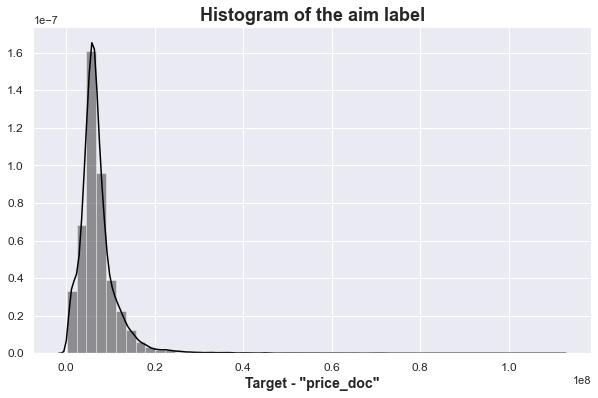

In [442]:
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.distplot(train_main['price_doc'], color = 'black')
plt.xlabel('Target - "price_doc"', fontsize=14, fontweight="bold")
plt.title('Histogram of the aim label', fontsize=18, fontweight="bold")
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

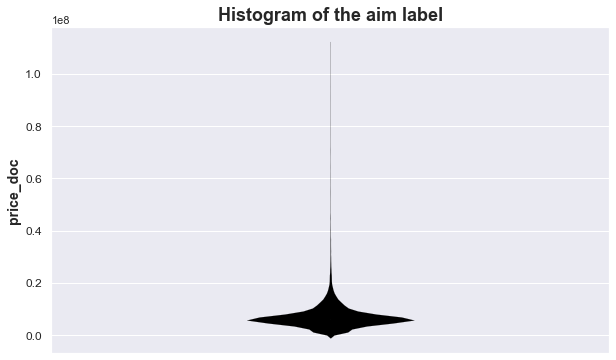

In [443]:
plt.figure(figsize = (10, 6))
sns.violinplot(y=train_main['price_doc'], color='black', width=0.3, linewidth = 0.1)
plt.ylabel("price_doc", fontsize=14, fontweight="bold")
plt.title('Histogram of the aim label', fontsize=18, fontweight="bold")
plt.yticks(fontsize=12)
plt.xlabel('')
plt.show()

In [444]:
train_main['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

In [445]:
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
for q in quantiles:
    print('Квантиль {}:'.format(q))
    print(train_main['price_doc'].quantile(q))

Квантиль 0.1:
3000000.0
Квантиль 0.25:
4740002.0
Квантиль 0.5:
6274411.0
Квантиль 0.75:
8300000.0
Квантиль 0.9:
11800000.0


### *Таким образом, 90% объектов недвижимости стоят дороже 3 млн. руб., 10% объектов стоят дороже 11,8 млн. руб., цена основной массы объектов заключена в диапазоне от 4,75 до 8,3 млн. руб.*

## Dependence aim of week_number

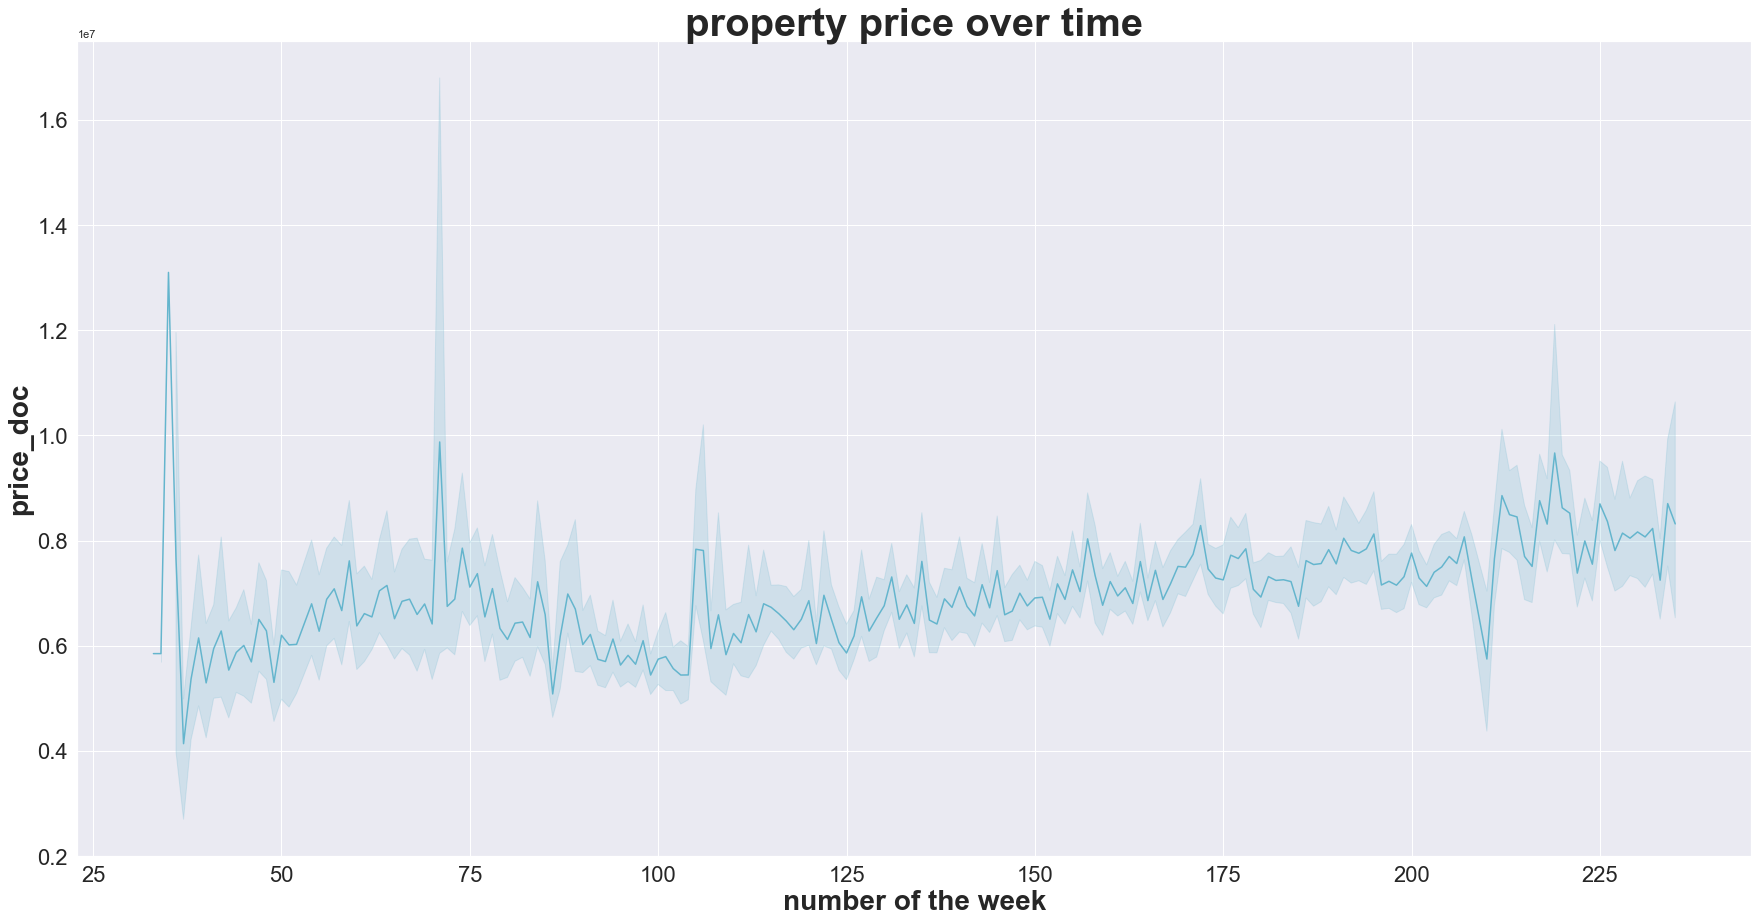

In [446]:
plt.figure(figsize=(30, 15))
sns.lineplot(x=train_main['week_count'], y=train_main['price_doc'], color='c')
plt.ylabel('price_doc', fontsize=28, fontweight="bold")
plt.xlabel('number of the week', fontsize=28, fontweight="bold")
plt.title('property price over time', fontsize=40, fontweight="bold")
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.show()

### *Наблюдается тренд на рост цены недвижимости.*

## Сolumns description

In [447]:
train_main[float_features + discrete_features].describe()

,full_sq,life_sq,kitch_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,young_all,work_all,ekder_all,children_school,hospital_beds_raion,metro_min_walk,market_shop_km,school_km,green_zone_km,mkad_km,sadovoe_km,radiation_km,floor,max_floor,build_year,num_room,month,year
count,30471.000000,24088.000000,20899.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,16030.000000,30446.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30304.000000,20899.000000,1.686600e+04,20899.000000,30471.000000,30471.000000
mean,54.214269,34.403271,6.399301,1.765705e+07,84056.425552,0.218922,0.118871,5140.026156,11178.809491,53667.908897,19209.707164,5354.269699,1190.738677,42.737601,3.958882,1.323956,0.300511,6.274764,14.056721,4.410781,7.670803,12.558974,3.068057e+03,1.909804,6.749237,2013.452726
std,38.031487,52.285733,28.265979,2.064961e+07,57871.285899,0.175090,0.118688,3816.625140,8287.957623,37483.559701,13174.721197,3989.640917,1057.015001,69.303131,3.447536,3.058145,0.298402,5.142492,8.343162,5.595367,5.319989,6.756550,1.543878e+05,0.851805,3.518748,0.962433
min,0.000000,0.000000,0.000000,2.081628e+06,2546.000000,0.001879,0.000000,175.000000,365.000000,1633.000000,548.000000,168.000000,0.000000,0.000000,0.003847,0.000000,0.000000,0.013626,0.000355,0.004663,0.000000,0.000000,0.000000e+00,0.000000,1.000000,2011.000000
25%,38.000000,20.000000,1.000000,7.307411e+06,21819.000000,0.063755,0.019509,1706.000000,3459.000000,13996.000000,4695.000000,1564.000000,520.000000,11.484150,1.543631,0.269716,0.100951,2.633404,8.346336,1.231846,3.000000,9.000000,1.967000e+03,1.000000,4.000000,2013.000000
50%,49.000000,30.000000,6.000000,1.050803e+07,83502.000000,0.167526,0.072158,4857.000000,10988.000000,52030.000000,20036.000000,5261.000000,990.000000,20.447209,2.927417,0.474862,0.214336,5.467510,12.748712,2.435160,6.500000,12.000000,1.979000e+03,2.000000,6.000000,2014.000000
75%,63.000000,43.000000,9.000000,1.803644e+07,122862.000000,0.336177,0.195781,7103.000000,14906.000000,77612.000000,29172.000000,7227.000000,1786.000000,45.322032,5.485423,0.886531,0.415498,8.184752,18.716620,4.687054,11.000000,17.000000,2.005000e+03,2.000000,10.000000,2014.000000
max,5326.000000,7478.000000,2014.000000,2.060718e+08,247469.000000,0.852923,0.521867,19223.000000,40692.000000,161290.000000,57086.000000,19083.000000,4849.000000,711.215806,41.103651,47.394706,1.982448,53.277832,68.853047,53.890157,77.000000,117.000000,2.005201e+07,19.000000,12.000000,2015.000000


## Float columns boxplot

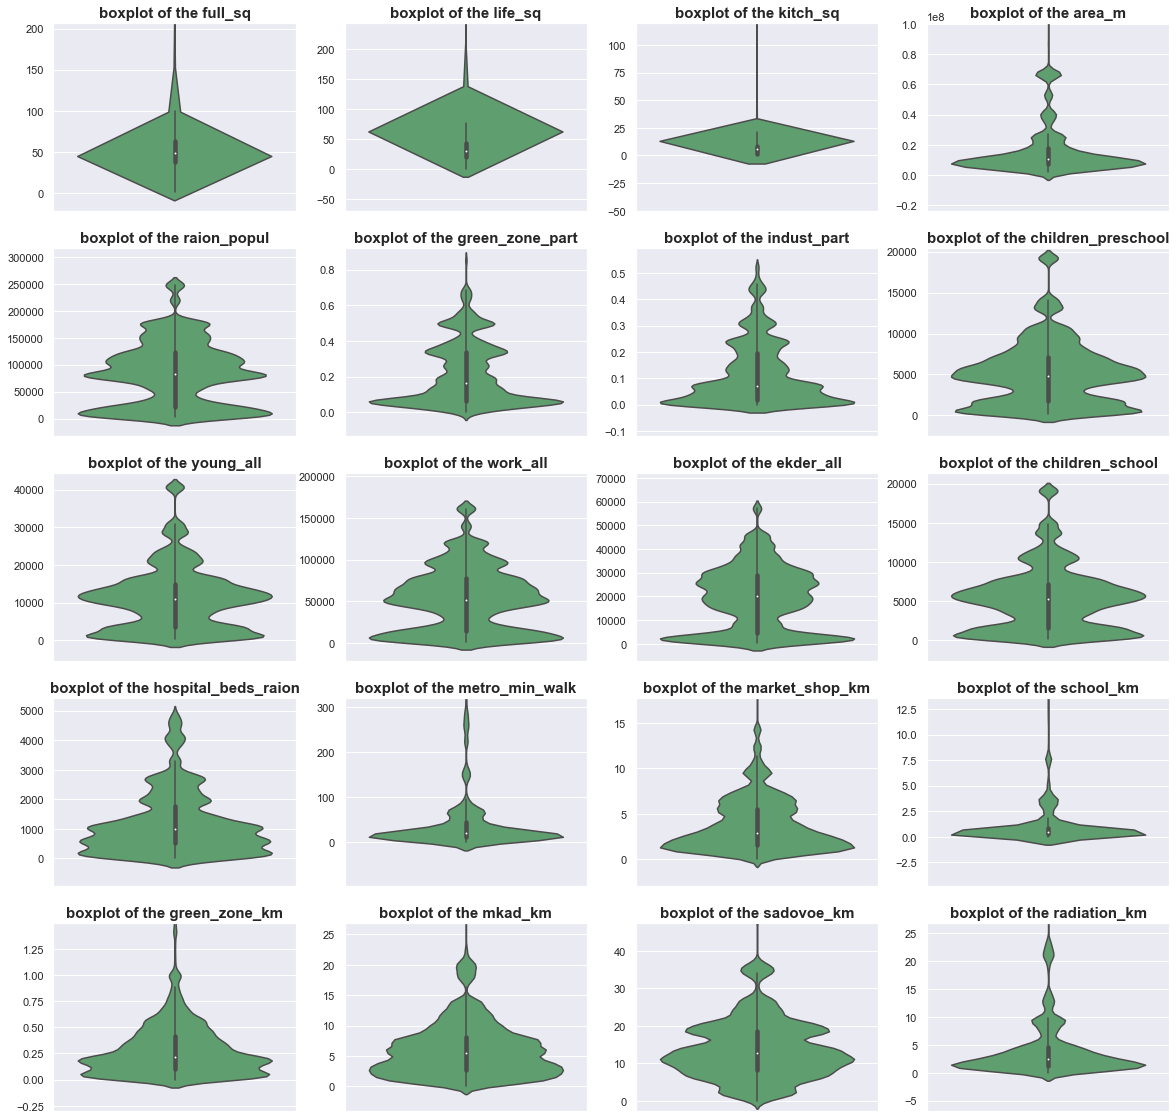

In [448]:
plt.figure(figsize=(20, 20))
subplot = 0
for feature in float_features:
    subplot += 1
    plt.subplot(5, 4, subplot)
    sns.violinplot(y=feature, data=train_main, color='g')
    plt.title('boxplot of the ' + feature, fontsize = 15, fontweight="bold")
    plt.ylim(np.mean(train_main[feature]) - 2 * np.std(train_main[feature]),
             np.mean(train_main[feature]) + 4 * np.std(train_main[feature]))
    plt.ylabel('')
plt.show()

### *Распределения непрерывных величин, большая часть которых не из нормального распределения, поэтому при их подаче на вход модели не помешает их нормализовать. Главные выводы: основная доля площади заключена между 38 и 68 квадратных метров, популяции района от 22 до 123 тыс. человек, расстояния до школы от 270 до 890 метров, минут до метро пешком от 11 до 45 минут и т.д. Ярко выраженных выбросов нету, любое сколь-либо странное значение признаков можно обосновать особенностью самого признака. При большой надобности можно изучить любой отдельно взятый признак подробно, если того потребует задача.*

## Discrete columns histogram

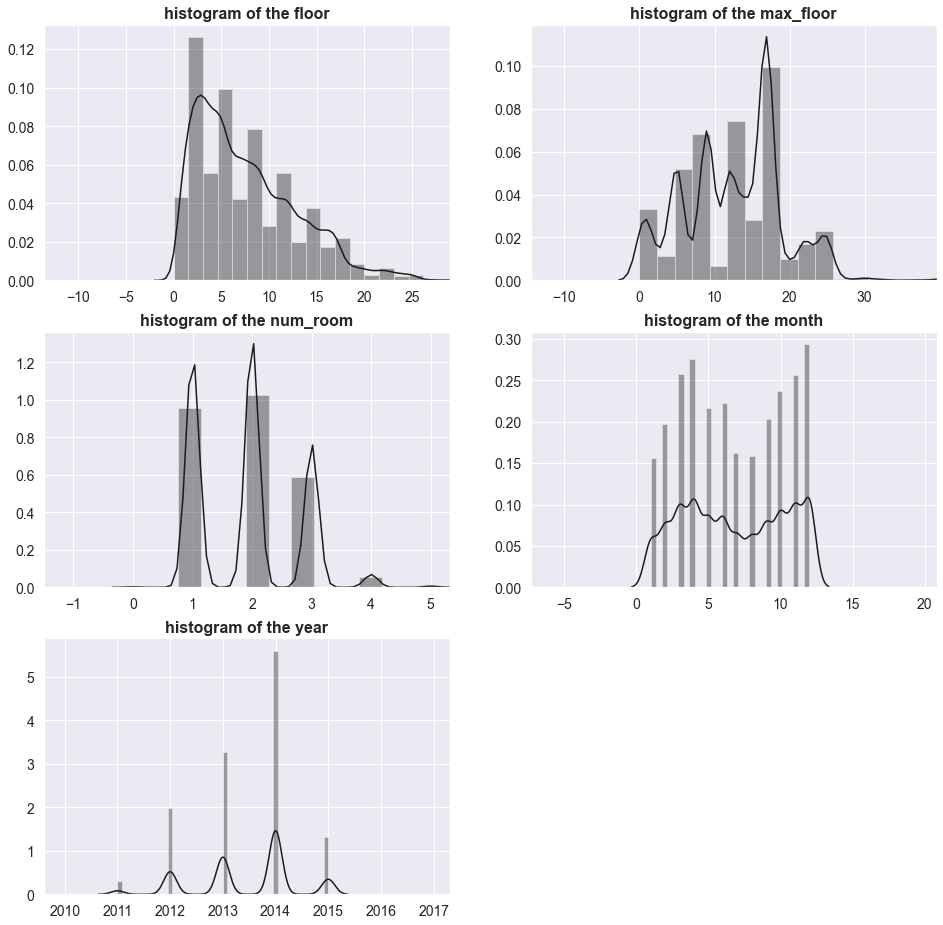

In [449]:
plt.figure(figsize=(16, 16))
subplot = 0
for feature in (discrete_features):
    if (feature != 'build_year'):
        subplot += 1
        plt.subplot(3, 2, subplot)
        sns.set(style='darkgrid')
        sns.distplot(train_main[feature], color='k')
        plt.xlim(np.mean(train_main[feature]) - 4 * np.std(train_main[feature]),
                 np.mean(train_main[feature]) + 4 * np.std(train_main[feature]))
        plt.title('histogram of the ' + feature, fontsize=16, fontweight="bold")
        plt.ylabel('')
        plt.xlabel('')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
plt.show()

### *Чаще всего продаются дома от 5 до 18 этажа. Количество комнат в объекте от 1 до 3. Больше всего данных за 2014 год! Заключено сделок больше всего марте, апреле и феврале.*

## Correalation between aim and float features

### Посмотрим на корреляцию Пирсона между непрерывными признаками и таргетом

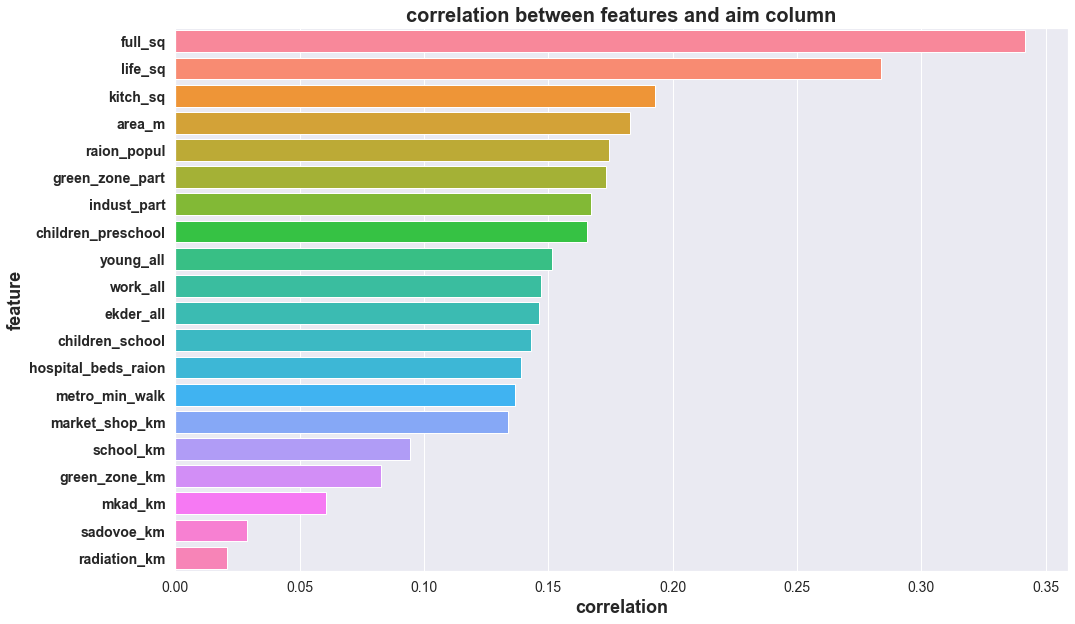

In [450]:
corr_list = [
    [],
    []
]
plt.figure(figsize=(16, 10))
for feature in float_features:
    corr = abs(train_main[feature].corr(train_main['price_doc']))
    corr_list[0].append(corr)
    corr_list[1].append(feature)
corr_list_sorted = corr_list[0].sort(reverse = True)
sns.barplot(x=corr_list[0], y=corr_list[1], saturation=1, orient = 'h')
plt.xlabel('correlation', fontsize=18, fontweight="bold")
plt.ylabel('feature', fontsize=18, fontweight="bold")
plt.title('correlation between features and aim column', fontsize=20, fontweight="bold")
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14, fontweight="bold")
plt.show()

### *Сильнее всего с ценой на недвижимость коррелирует общая площадь(жилай площадь и площадь кухни). А акже от прочих факторов(см. столбчатую диаграмму). То что у большинства признаков ненулевая корреляция с таргетом важно, потому что это указывает на существование связи между ними(поскольку она не обязательно должна быть линейной, ведь корреляция Пирсона показывает степень линейности между двумя случайными величинами, но признаки могут зависеть и нелинейно).*

## Cross correlation between features

### Не помешает измерить корреляцию между признаками, поскольку это может сыграть большую роль в обучении моделей. Например, линейные модели совсем не любят мультиколлинеарность между признаками, поскольку число обусловленности матрицы признаков будет высоким, а значит градиентный спуск будет долго сходиться. Линейно-зависимые признаки лишь повышают размерность пространство, при этом информативности это не добавляет, поэтому качество модели вероятнее всего это не добавит, а скорость обучения модели увеличится.

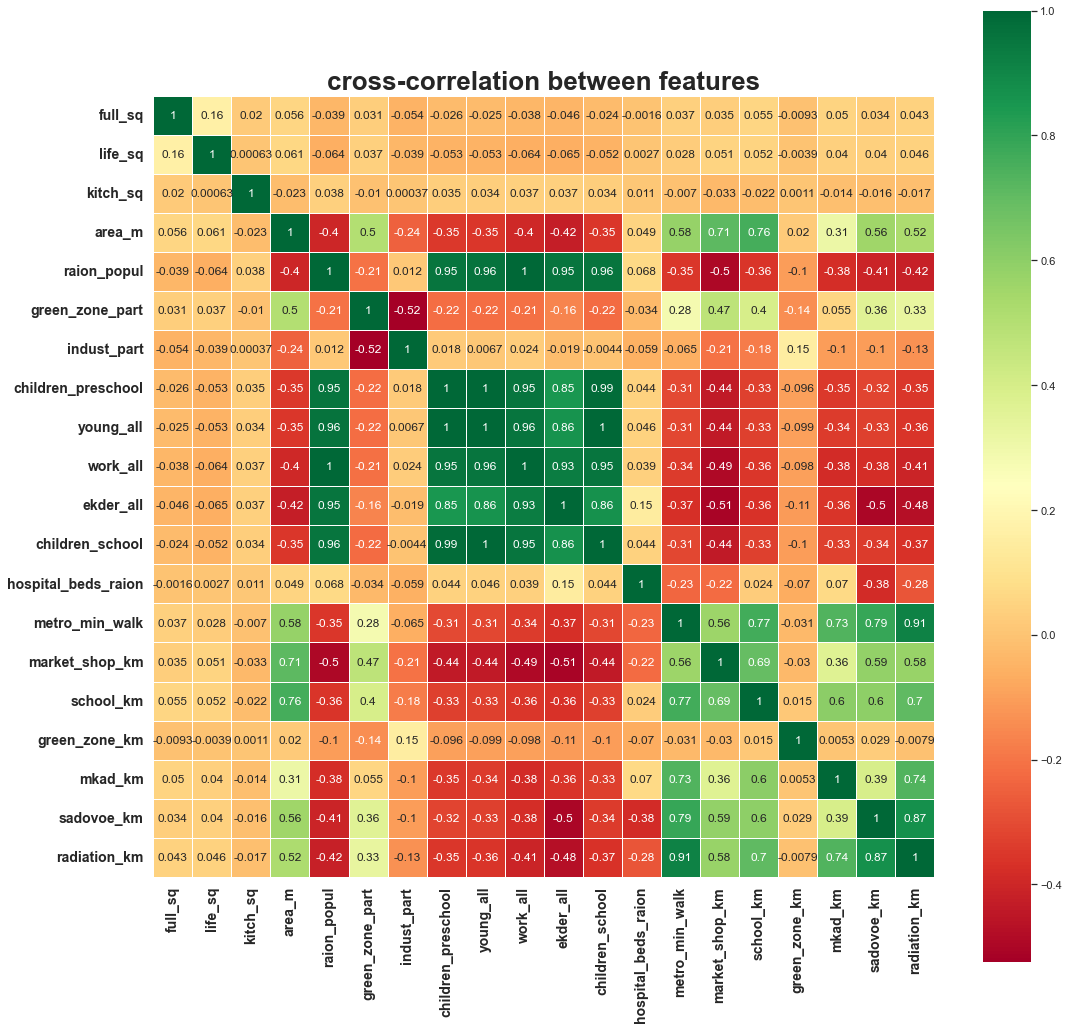

In [451]:
plt.figure(figsize=(17.5, 17.5))
sns.heatmap(train_main[float_features].corr(), square=True, annot=True, linewidth=0.5, cmap = 'RdYlGn')
plt.xticks(fontsize = 14, fontweight="bold")
plt.yticks(fontsize = 14, fontweight="bold")
plt.title('cross-correlation between features', fontsize=26, fontweight='bold')
plt.show()

### Как можно видеть между собой признаки зависят довольно слабо, кроме признаков raion_popul, children_preschool, young_all, work_all, ekder_all, children_school. Ну действительно, все эти признаки отвечают за численность тех или иных групп людей на районе, естественно они все взаимосвязаны друг с другом, поэтому между ними имеется линейная зависимость, это не есть хорошо. Также, столбец radiation_km сильно коррелирован с metro_min_walk(?) и sadovoe_km.  Все остальные столбцы как и ожидалось почти не зависят друг от друга. Будем это учитывать в дальнейшем.

## Dependence between feature and aim 

### Проследим зависимость случайной величины каждого признака от случайной величины таргета.

### Square features:

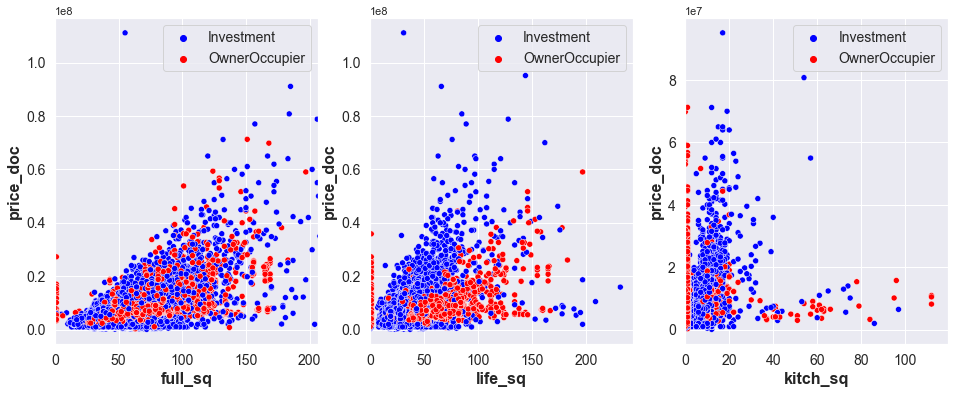

In [452]:
plt.figure(figsize=(16, 6))
square_features = ['full_sq', 'life_sq', 'kitch_sq']
subplot = 0
for feature in square_features:
    subplot += 1
    plt.subplot(1, 3, subplot)
    sns.scatterplot(x=feature, y='price_doc', data=train_main, hue='product_type',
                    palette = {'Investment':'blue','OwnerOccupier':'red'})
    plt.xlim(0, np.mean(train_main[feature]) + 4 * np.std(train_main[feature]))
    plt.xlabel(feature, fontsize=16, fontweight="bold")
    plt.ylabel('price_doc', fontsize=16, fontweight="bold")
    plt.legend()
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 14)
plt.show()

### *Как можно видеть зависит от цены вся площадь и площадь жилых комнат. Площадь кухни почти не влияет на цену недвижимости. Более того, из графика видна линейная зависимость между площадью и ценой, однако, поскольку эти величины случайные, то коэффициент корреляции Пирсона низок!*

### Из графика можно видеть неприятный эффект - соответствующие площади некоторых объектов равны нулю, этот факт не поддается здравому смыслу, поэтому избавимся от этих объектов(это не сильно повлияет на объем выборок). Пусть площадь всегда должна быть больше 3 квадратных метров.

In [453]:
for feature in square_features:
    train_main = train_main[train_main[feature] > 3]

### Distance features

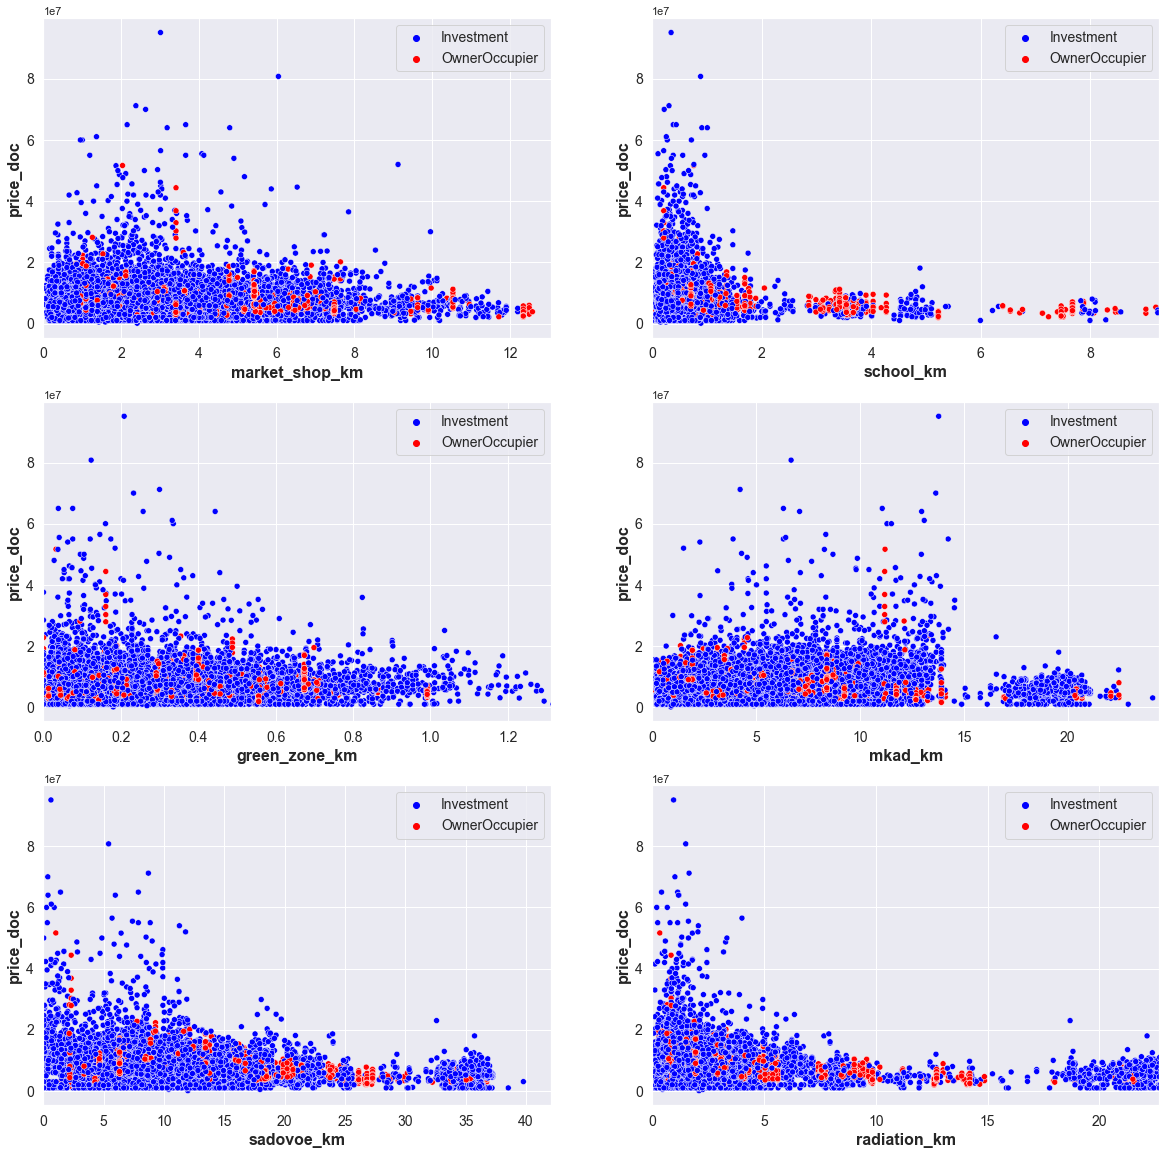

In [454]:
plt.figure(figsize=(20, 20))
km_features = ['market_shop_km', 'school_km', 'green_zone_km', 'mkad_km', 'sadovoe_km', 'radiation_km']
subplot = 0
for feature in km_features:
    subplot += 1
    plt.subplot(3, 2, subplot)
    sns.scatterplot(x=feature, y='price_doc', data=train_main, hue='product_type',
                    palette = {'Investment':'blue','OwnerOccupier':'red'})
    plt.xlim(0, np.mean(train_main[feature]) + 4 * np.std(train_main[feature]))
    plt.xlabel(feature, fontsize=16, fontweight="bold")
    plt.ylabel('price_doc', fontsize=16, fontweight="bold")
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 14)
plt.show()

### *Тенденции следующие: Чем дальше расстояние до ближайшего крупного магазина, тем меньше цена за объект(особенно для расстояний больше 8 км), чем больше расстояние от объекта до школы, тем меньше цена(цена ЗНАЧИТЕЛЬНО меньше при расстояниях, больших 1.5 - 2.0 км, вероятно это объекты далекие даже от мкада), чем ближе объект к садовому кольцу, тем больше на него цена. Сложно что-то сказать про расстояние до зеленых зон, график распределен более менее равномерно в окрестности некоторого среднего значения. С расстоянием от мкада до объекта все сложнее, дело в том, что объект может быть как внутри кольца мкада, так и вне него, во многом все зависит от того, это вносит большую неясность в соответствующую зависимость(которую иллюстрирует 4й график), поэтому сам по себе фактор плохо определяет цену, однако при расстояниях больших 15 км от мкада наблюдается резкий спад цены, эти объекты гарантировано находятся за мкадом, то есть очень далеко от центра города, что и объясняет их низкую цену, поэтому для этих объектов фактор "расстояние до мкада" является определяющим. Признак "расстояние до мест захоронения отходов" и таргет имеют крайне низкую причинно-следственную связь(это видно, как из графика, так и из диаграммы корреляции), поэтому он бесполезен.*

### Population features

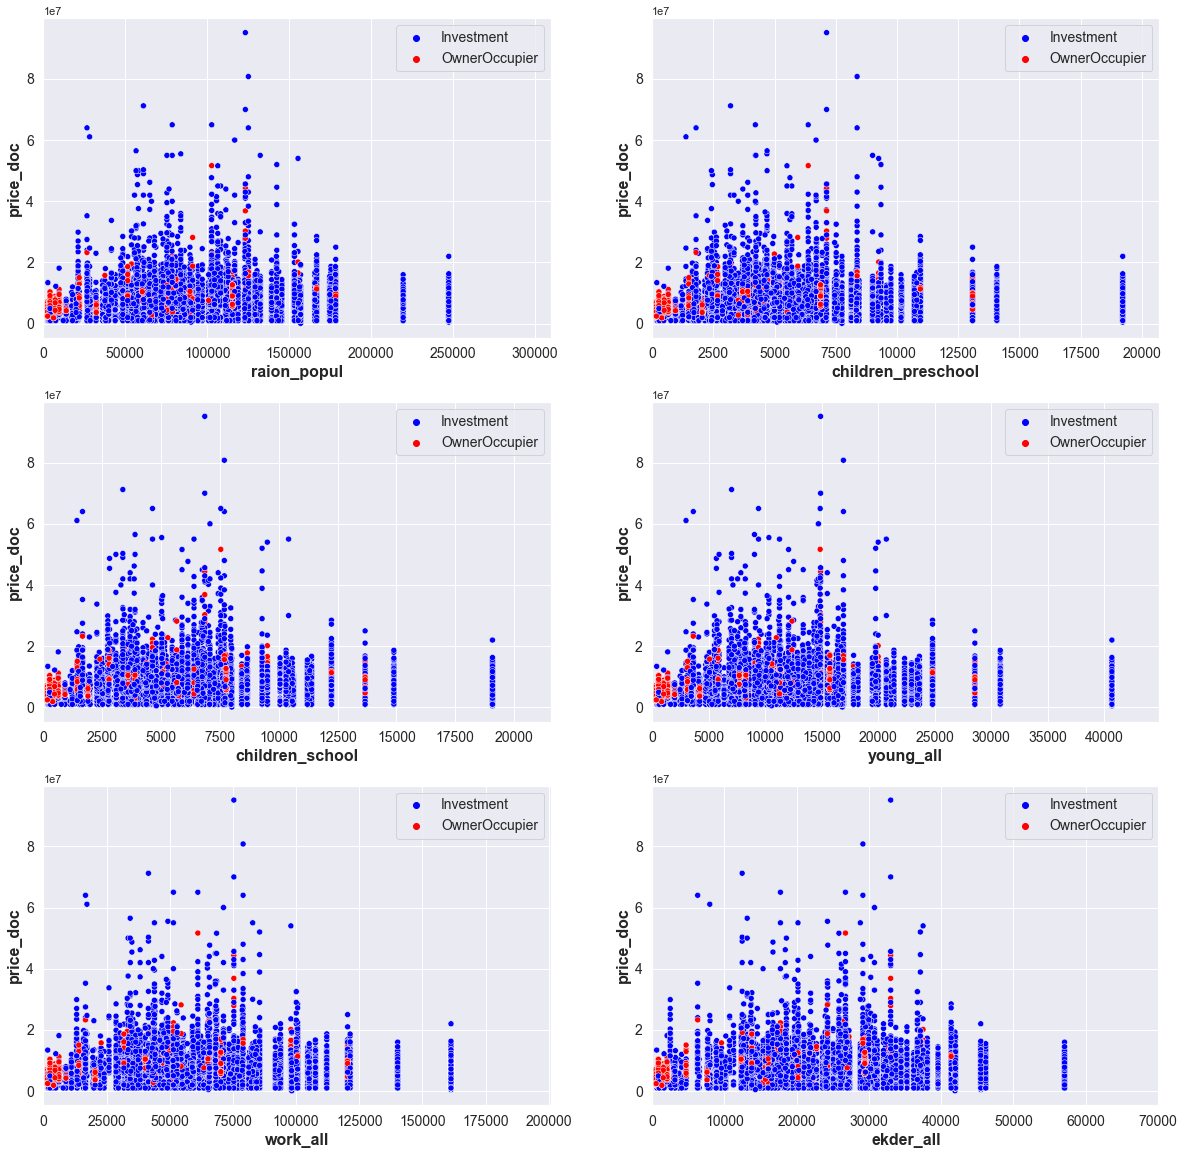

In [455]:
plt.figure(figsize=(20, 20))
population_features = ['raion_popul', 'children_preschool', 'children_school', 'young_all', 'work_all', 'ekder_all']
subplot = 0
for feature in population_features:
    subplot += 1
    plt.subplot(3, 2, subplot)
    sns.scatterplot(x=feature, y='price_doc', data=train_main, hue='product_type',
                    palette = {'Investment':'blue','OwnerOccupier':'red'})
    plt.xlim(0, np.mean(train_main[feature]) + 4 * np.std(train_main[feature]))
    plt.xlabel(feature, fontsize=16, fontweight="bold")
    plt.ylabel('price_doc', fontsize=16, fontweight="bold")
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 14)
plt.show()

### *Ранее выяснено, что корреляция между этими признаками близка к 1, а значит все они зависят примерно одинаково и от целевой переменной! Поэтому описав зависимость случайной величины одного из этих признаков от таргета, можно сказать тоже самое и о других. Правда в том, что практически никакой явной зависимости между таргетом и любым из этих признаков нету(либо есть скрытые зависимости, которые способны обнаружить ансамблевые методы или нейросети).*

## Floor features

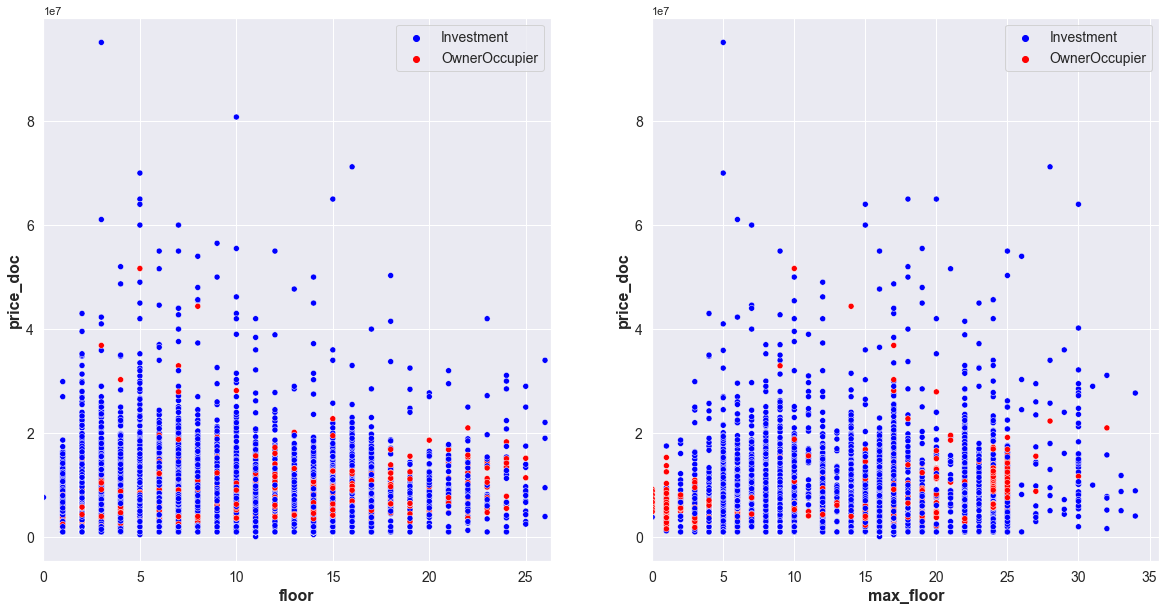

In [456]:
plt.figure(figsize=(20, 10))
floor_features = ['floor', 'max_floor']
subplot = 0
for feature in floor_features:
    subplot += 1
    plt.subplot(1, 2, subplot)
    sns.scatterplot(x=feature, y='price_doc', data=train_main, hue='product_type',
                    palette = {'Investment':'blue','OwnerOccupier':'red'})
    plt.xlim(0, np.mean(train_main[feature]) + 4 * np.std(train_main[feature]))
    plt.xlabel(feature, fontsize=16, fontweight="bold")
    plt.ylabel('price_doc', fontsize=16, fontweight="bold")
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 14)
plt.show()

### Цена на объект независит ни от номера этажа квартиры, ни от количества этажей в квартире.

## Other features

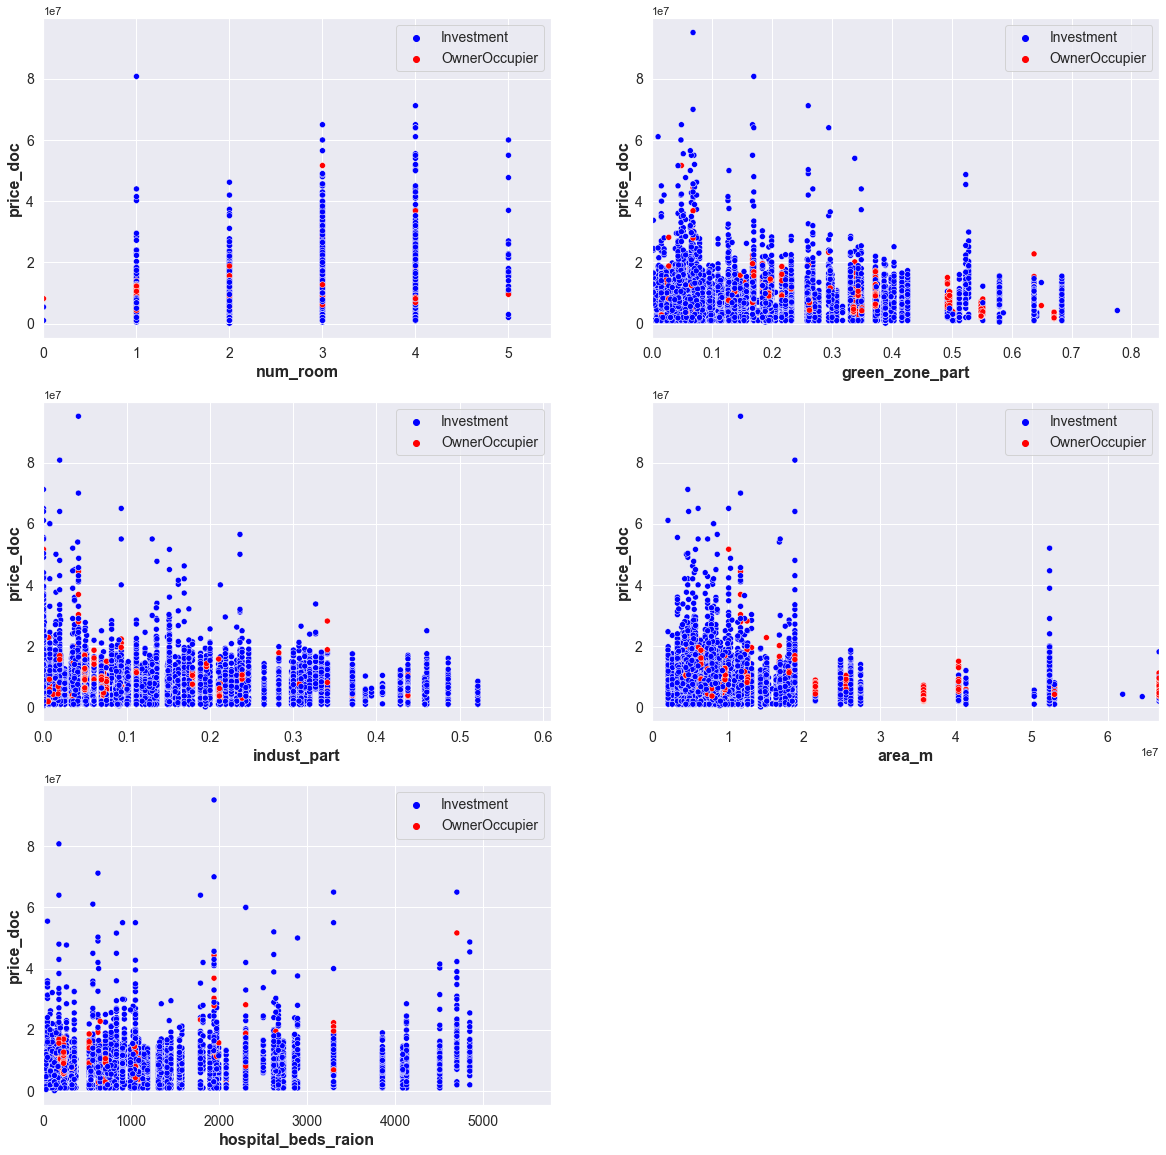

In [457]:
other_features = ['num_room', 'green_zone_part', 'indust_part', 'area_m', 'hospital_beds_raion']
plt.figure(figsize=(20, 20))
subplot = 0
for feature in other_features:
    subplot += 1
    plt.subplot(3, 2, subplot)
    sns.scatterplot(x=feature, y='price_doc', data=train_main, hue='product_type',
                    palette = {'Investment':'blue','OwnerOccupier':'red'})
    plt.xlim(0, np.mean(train_main[feature]) + 4 * np.std(train_main[feature]))
    plt.xlabel(feature, fontsize=16, fontweight="bold")
    plt.ylabel('price_doc', fontsize=16, fontweight="bold")
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.legend(fontsize = 14)
plt.show()

### *Маловлияющие признаки, общих тенденций не найдено*.

## *Итак, в процессе анализа данных были получены ответы на все 5 гипотез. А также получена информация о признаках, которая поможет с большим успехом обучить модель. Обо всем по порядку.* 

# Data preprocessing

## Dropping useless features

In [458]:
train_main = train_main.drop(['children_preschool', 'young_all', 'work_all', 'ekder_all', 'children_school', 'floor', 
                              'max_floor', 'kitch_sq', 'radiation_km'], axis=1)

In [459]:
train_data = train_main.drop(['timestamp', 'year', 'month', 'week_of_year'], axis=1)

## Dumi-coding of categorical features

In [460]:
train_data = pd.get_dummies(train_data, drop_first=True)

In [461]:
X = train_data.drop(['price_doc'], axis=1)
Y = train_data['price_doc']

## Filling Nan's(median)

In [462]:
def nan(feature):
    if (X[feature].dtype == 'float'):
        median = X[X[feature].isnull() == False][feature].median()
        X[feature] = X[feature].fillna(median)
    else:
        median = int(X[X[feature].isnull() == False][feature].median())
        X[feature] = X[feature].fillna(median)

In [463]:
for feature in X.columns:
    nan(feature)

In [464]:
X.isnull().sum()

full_sq                       0
life_sq                       0
material                      0
build_year                    0
num_room                      0
                             ..
sub_area_Vyhino-Zhulebino     0
sub_area_Zamoskvorech'e       0
sub_area_Zapadnoe Degunino    0
sub_area_Zjablikovo           0
sub_area_Zjuzino              0
Length: 163, dtype: int64

In [465]:
print('Всего пропусков по всем столбцам: {}'.format(X.isnull().sum().sum()))

Всего пропусков по всем столбцам: 0


## Split data to train and test samples

In [466]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=1)

## Data normalization

In [467]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Trying regression models

## Linear models

### Будем обучать так называемую baseline модель(то есть без подбора гиперпараметров), чтобы понять какая из моделей лучше всего адаптирована под выборку.

In [468]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import GammaRegressor

In [469]:
models = [LinearRegression(), Ridge(), SGDRegressor(), ElasticNet(), Lasso(), BayesianRidge(), Lars(), LassoLars(), 
          OrthogonalMatchingPursuit(), ARDRegression(), PoissonRegressor(), TweedieRegressor(), GammaRegressor()]
name_models = ['LinearRegression', 'Ridge', 'SGDRegressor', 'ElasticNet', 'Lasso', 'BayesianRidge', 'Lars', 'LassoLars',
               'OrthogonalMatchingPursuit', 'ARDRegression', 'PoissonRegressor', 'TweedieRegressor', 'GammaRegressor']

In [470]:
model_quality = []

In [471]:
for i in range(len(name_models)):
    model = models[i]
    name_model = name_models[i]
    model.fit(X_train_scaled, y_train)
    
    predictions = model.predict(X_test_scaled)
    
    mean_absolute_score = metrics.mean_absolute_error(y_test, predictions)
    mean_squared_error = metrics.mean_squared_error(y_test, predictions)
    r2_score = metrics.r2_score(y_test, predictions)
    model_quality.append([name_model, mean_absolute_score, 
                          mean_squared_error, r2_score])

In [472]:
model_quality = pd.DataFrame(data = model_quality, columns = ['model', 'mean_absolute_score', 'mean_squared_score', 'r2_score'])

In [473]:
model_quality.sort_values(by = 'mean_absolute_score', ascending = True)

,model,mean_absolute_score,mean_squared_score,r2_score
10,PoissonRegressor,1.830748e+06,8.970066e+12,6.515980e-01
5,BayesianRidge,1.938615e+06,1.112214e+13,5.680103e-01
1,Ridge,1.941280e+06,1.118031e+13,5.657508e-01
7,LassoLars,1.941875e+06,1.119314e+13,5.652526e-01
4,Lasso,1.948224e+06,1.128927e+13,5.615189e-01
3,ElasticNet,1.957061e+06,1.255615e+13,5.123125e-01
12,GammaRegressor,1.973433e+06,1.143011e+13,5.560486e-01
11,TweedieRegressor,1.984530e+06,1.360092e+13,4.717332e-01
8,OrthogonalMatchingPursuit,2.033751e+06,1.177708e+13,5.425719e-01
9,ARDRegression,2.088066e+06,1.250817e+13,5.141764e-01


### *Лучший результат показала модель "PoissonRegressor". Оно и понятно, ведь таргет имеет распределение очень близкое к Пуассонову(см. график 1). Однако, прежде чем делать какие-либо выводы, посмотрим на остальные модели регрессии.*

### Non-linear(simple) models

In [474]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [475]:
models = [SVR(), KNeighborsRegressor(), DecisionTreeRegressor()]
name_models = ['SVR', 'KNeighborsRegressor', 'DecisionTreeRegressor']

In [476]:
model_quality = []

In [477]:
for i in range(len(name_models)):
    model = models[i]
    name_model = name_models[i]
    model.fit(X_train_scaled, y_train)
    
    predictions = model.predict(X_test_scaled)
    
    mean_absolute_score = metrics.mean_absolute_error(y_test, predictions)
    mean_squared_error = metrics.mean_squared_error(y_test, predictions)
    r2_score = metrics.r2_score(y_test, predictions)
    model_quality.append([name_model, mean_absolute_score, 
                          mean_squared_error, r2_score])

In [478]:
model_quality = pd.DataFrame(data = model_quality, columns = ['model', 'mean_absolute_score', 'mean_squared_score', 'r2_score'])

In [479]:
model_quality.sort_values(by = 'mean_absolute_score', ascending = True)

,model,mean_absolute_score,mean_squared_score,r2_score
1,KNeighborsRegressor,2.052394e+06,1.183268e+13,0.540412
2,DecisionTreeRegressor,2.883999e+06,2.168728e+13,0.157655
0,SVR,2.968587e+06,2.652239e+13,-0.030143


### *Простые нелинейные модели уступают по качеству даже линейным.*

## Ensemble models

### Пока просто baseline модели, потом можно попробовать обучить xgboost

In [480]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [481]:
models = [RandomForestRegressor(), GradientBoostingRegressor()]
name_models = ['RandomForestRegressor', 'GradientBoostingRegressor']

In [482]:
model_quality = []

In [483]:
for i in range(len(name_models)):
    model = models[i]
    name_model = name_models[i]
    model.fit(X_train_scaled, y_train)
    
    predictions = model.predict(X_test_scaled)
    
    mean_absolute_score = metrics.mean_absolute_error(y_test, predictions)
    mean_squared_error = metrics.mean_squared_error(y_test, predictions)
    r2_score = metrics.r2_score(y_test, predictions)
    model_quality.append([name_model, mean_absolute_score, 
                          mean_squared_error, r2_score])

In [484]:
model_quality = pd.DataFrame(data = model_quality, columns = ['model', 'mean_absolute_score', 'mean_squared_score', 'r2_score'])

In [485]:
model_quality.sort_values(by = 'mean_absolute_score', ascending = True)

,model,mean_absolute_score,mean_squared_score,r2_score
0,RandomForestRegressor,2.087290e+06,1.070096e+13,0.584369
1,GradientBoostingRegressor,2.171896e+06,1.030539e+13,0.599733


### *Пока что результаты не впечатляют, линейный модели лучше ансамблевых. Обучим xgboost и посмотрим на его ошибку на данных.*

## Xgboost

In [486]:
import xgboost as xgb

In [487]:
xgb_train = xgb.DMatrix(data = X_train, label = y_train)
xgb_test = xgb.DMatrix(data = X_test)

In [488]:
params = {
    # booster - gbtree: базовый алгоритм - дерево решений
    # nthread - количество потоков параллельных вычислений
    # num_feature - количество признаков при обучении одного базового алгоритма
    'eta' : 0.1, # темп обучения
    'max_depth' : 4, # максимальная глубина дерева
    'subsample' : 0.8, # подвыборка для обучения одного базового алгоритма
    # gamma - минимальное снижение функции потерь для продолжения построения базового алгоритма
    # max_leave - максимальное количество листьев дерева
    # lambda - коэффициент l2 регуляризации
    # alpha - коэффициент l1 регуляризации
    # colsample_by* - деление выборки на подвыборки(3 разных варианта: по дереву, по уровню(глубине), по узлу)
}

In [489]:
num_round = 500 # количество деревьев в ансамбле

In [490]:
model = xgb.train(params, xgb_train, num_round)

In [491]:
predictions = model.predict(xgb_test)

In [492]:
mean_absolute_score = metrics.mean_absolute_error(y_test, predictions)
mean_squared_error = metrics.mean_squared_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)

In [493]:
pd.DataFrame(data = [['xgboost', mean_absolute_score, mean_squared_error, r2_score]], 
             columns = ['model', 'mean_absolute_score', 'mean_squared_score', 'r2_score'])

,model,mean_absolute_score,mean_squared_score,r2_score
0,xgboost,1.709615e+06,8.467194e+12,0.67113


### *Таким образом, xgboost показывает значительно лучшие результаты(модель настраивалась по общим рекомендациям, исходя из принципов работы градиентного бустинга и xgboost в частности, а также при некотором переборе параметров params).*

### Рассмотрим теперь все возможные признаки, которые нам дали. Использовать будем только сильные градиентные модели, такие как xgboost. Посмотрим удастся ли улучшить метрику качества модели.

# Upgrading Model

### Будем работать с исходным набором данных train(датафрейм, отображающий все исходные признаки)

## Feature preprocessing

In [494]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road2_km,ID_big_road2,railroad_km,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg_price_2000,cafe_count_2000_na_price,cafe_count_2000_price_500,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_high,big_church_count_2000,church_count_2000,mosque_count_2000,leisure_c

In [495]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [496]:
train.shape

(30471, 292)

In [497]:
train['timestamp'] = pd.to_datetime(train['timestamp'], format='%Y-%m-%d')
train['year'] = train['timestamp'].dt.year
train['month'] = train['timestamp'].dt.month
train['week_of_year'] = train['timestamp'].dt.weekofyear

## Week

In [498]:
def week_number(row):
    year = row['year']
    week_number = row['week_of_year']
    if (year == 2011):
        return week_number
    if (year == 2012):
        return week_number + 52
    if (year == 2013):
        return week_number + 2 * 52
    if (year == 2014):
        return week_number + 3 * 52
    if (year == 2015):
        return week_number + 4 * 52


train['week_count'] = train.apply(week_number, axis=1)

## Floor

In [499]:
def floor_type(row):
    if (row['floor'] <= 4):
        return 'small_floor'
    if ((row['floor'] > 4) & (row['floor'] <= 12)):
        return 'middle_floor'
    else:
        return 'high_floor'


train['floor_type'] = train.apply(floor_type, axis=1)

## Removing extra columns

In [500]:
train = train.drop(['id', 'timestamp', 'month', 'week_of_year', 'ID_railroad_station_walk', 'ID_metro',
                    'ID_railroad_station_avto'], axis=1)

## Dumi-coding of categorical features

In [501]:
train = pd.get_dummies(train, drop_first=True)

### Попробуем 2 варианта обучения модели, с заполнением пропусков и без заполнения пропусков и сравним качество, окончательную модель будем использовать исходя из качества исходных двух.

In [502]:
X = train.drop(['price_doc'], axis=1)
Y = train['price_doc']

# Xgboost without filling NaN's

In [503]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=5)

In [504]:
xgb_train = xgb.DMatrix(data = X_train, label = y_train)
xgb_test = xgb.DMatrix(data = X_test)

In [505]:
params = {
    'eta' : 0.1,
    'max_depth' : 4, 
    'subsample' : 0.8, 
    'colsample_bytree': 0.7,
}

In [506]:
num_round = 500 

In [507]:
model = xgb.train(params, xgb_train, num_round)

In [508]:
predictions = model.predict(xgb_test)

In [509]:
mean_absolute_score = metrics.mean_absolute_error(y_test, predictions)
mean_squared_error = metrics.mean_squared_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)

In [510]:
pd.DataFrame(data = [['xgboost', mean_absolute_score, mean_squared_error, r2_score]], 
             columns = ['model', 'mean_absolute_score', 'mean_squared_score', 'r2_score'])

,model,mean_absolute_score,mean_squared_score,r2_score
0,xgboost,1.380748e+06,6.665876e+12,0.708723


### Результаты получились гораздо лучше, чем при обучении модели только с "главными" признаками. Посмотрим, что получится, если заполнить пропуски и немного преобразовать признаки "человеческим способом".

## Filling NaN's

In [511]:
for feature in train.columns:
    if (train[feature].isnull().sum() >= 10000):
        train = train.drop([feature], axis=1)

In [512]:
features_with_nan = []
for feature in train.columns:
    if (train[feature].isnull().sum() > 0):
        features_with_nan.append(feature)

In [513]:
features_with_nan

['life_sq',
 'floor',
 'max_floor',
 'material',
 'num_room',
 'kitch_sq',
 'preschool_quota',
 'school_quota',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'metro_km_walk',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_avg_price_2000',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_avg_price_3000',
 'prom_part_5000',
 'cafe_su

In [514]:
train = train.drop(['floor', 'max_floor', 'material', 'raion_build_count_with_material_info',
                    'raion_build_count_with_builddate_info', 'metro_km_walk', 'railroad_station_walk_min', ], axis=1)

In [515]:
features_with_nan = []
for feature in train.columns:
    if (train[feature].isnull().sum() > 0):
        features_with_nan.append(feature)

In [516]:
features_with_nan

['life_sq',
 'num_room',
 'kitch_sq',
 'preschool_quota',
 'school_quota',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_walk',
 'railroad_station_walk_km',
 'cafe_sum_1000_min_price_avg',
 'cafe_sum_1000_max_price_avg',
 'cafe_avg_price_1000',
 'cafe_sum_1500_min_price_avg',
 'cafe_sum_1500_max_price_avg',
 'cafe_avg_price_1500',
 'cafe_sum_2000_min_price_avg',
 'cafe_sum_2000_max_price_avg',
 'cafe_avg_price_2000',
 'cafe_sum_3000_min_price_avg',
 'cafe_sum_3000_max_price_avg',
 'cafe_avg_price_3000',
 'prom_part_5000',
 'cafe_sum_5000_min_price_avg',
 'cafe_sum_5000_max_price_avg',
 'cafe_avg_price_5000']

In [517]:
input_zero = ['build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith',
              'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'build_count_before_1920',
              'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', ]
input_median = ['life_sq', 'kitch_sq', 'railroad_station_walk_km', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
                'cafe_avg_price_1000', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500',
                'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
                'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'prom_part_5000',
                'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000', 'preschool_quota',
                'school_quota']
input_mines_one = ['num_room', 'metro_min_walk']

In [518]:
for feature in input_zero:
    train[feature] = train[feature].fillna(0)
    
for feature in input_median:
    if (train[feature].dtype == 'float'):
        median = train[train[feature].isnull() == False][feature].median()
        train[feature] = train[feature].fillna(median)
    else:
        median = int(train[train_data[feature].isnull() == False][feature].median())
        train[feature] = train[feature].fillna(median)
        
for feature in input_mines_one:
    train[feature] = train[feature].fillna(-1)

In [519]:
train.isnull().sum().sum()

0

## Transfromation of the "500", "1000", "1500", "2000", "5000" features 

### Идея преобразования в следующем: в датасете существуют признаки, отвечающие за количество определенных объектов инфраструктуры в радиусе 500, 1000, ... километров. Логично оставить признаки, которые говорили бы о количестве инфраструктуры данног типа лишь в радиусе 1 километра, остальные признаки уберем. Это позволит значительно понизить размерность и вероятно не потерять в качестве.

### К таким признакам относятся: green_part_1000, prom_part_1000, office_count_1000, office_sqm_1000, trc_count_1000, trc_sqm_1000, cafe_count_1000, big_church_count_1000, church_count_1000, mosque_count_1000, leisure_count_1000, sport_count_1000, market_count_1000

In [521]:
for feature in train.columns:
    if (('count_500' in feature) or ('count_1500' in feature) or ('count_2000' in feature) or ('count_5000' in feature)
        or ('count_3000' in feature) or ('count_4000' in feature)):
        train = train.drop([feature], axis=1)


## Xgboost with filling NaN's and feature transformation

In [522]:
X = train.drop(['price_doc'], axis = 1)
Y = train['price_doc']

In [523]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = 0.2, 
                                                                    random_state = 11)

In [524]:
D_train = xgb.DMatrix(X_train, label = y_train, feature_names=X_train.columns.values)
D_test = xgb.DMatrix(X_test, label = y_test)

In [525]:
params = {
    'eta' : 0.1,
    'max_depth' : 4,
    'subsample' : 0.8,
    'colsample_bytree': 0.7
}

In [526]:
num_round = 500

In [527]:
xgb_model = xgb.train(dict(params), D_train, num_round)

In [528]:
predictions = xgb_model.predict(D_test)

In [529]:
mean_absolute_score = metrics.mean_absolute_error(y_test, predictions)
mean_squared_error = metrics.mean_squared_error(y_test, predictions)
r2_score = metrics.r2_score(y_test, predictions)

In [530]:
pd.DataFrame(data = [['xgboost', mean_absolute_score, mean_squared_error, r2_score]], 
             columns = ['model', 'mean_absolute_score', 'mean_squared_score', 'r2_score'])

,model,mean_absolute_score,mean_squared_score,r2_score
0,xgboost,1.403528e+06,6.364527e+12,0.72793


### *Качество практически не изменилось(немного ухудшилось), но время обучения уменьшилось. 

## Top 50 most important features

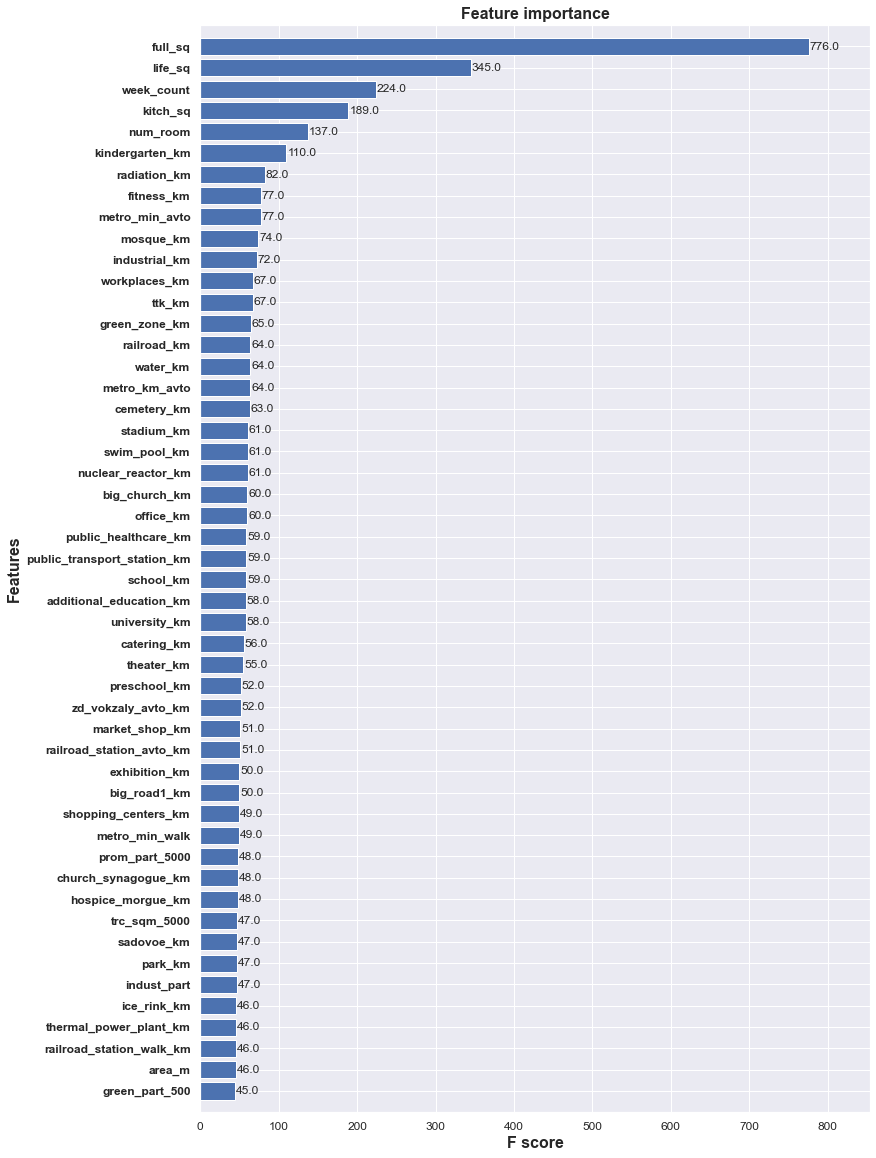

In [531]:
fig, ax = plt.subplots(figsize=(12,20))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.8, ax=ax)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12, fontweight="bold")
plt.title('Feature importance',fontsize = 16, fontweight="bold")
plt.xlabel('F score', fontsize = 16, fontweight="bold")
plt.ylabel('Features', fontsize = 16, fontweight="bold")
plt.show()

# *Итак лучшая модель построена для всей выборки(без заполнения пропусков и преобразований признаков). Ошибка MAE = 1.38 млн. рублей.*